**Project 1: Neural Netwroks_Classification_MNIST_Dataset_Keras_Tensorflow**

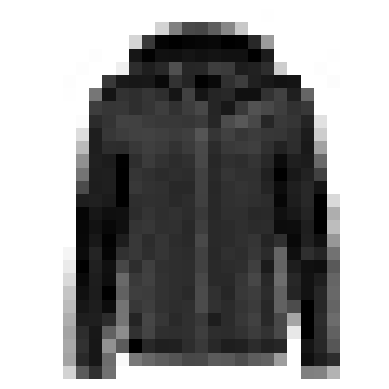

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7625 - loss: 0.7189 - val_accuracy: 0.8250 - val_loss: 0.5137
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8301 - loss: 0.4863 - val_accuracy: 0.8464 - val_loss: 0.4511
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8451 - loss: 0.4417 - val_accuracy: 0.8564 - val_loss: 0.4199
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8549 - loss: 0.4150 - val_accuracy: 0.8620 - val_loss: 0.4005
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8623 - loss: 0.3954 - val_accuracy: 0.8676 - val_loss: 0.3856
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8680 - loss: 0.3795 - val_accuracy: 0.8702 - val_loss: 0.3745
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8717 - loss: 0.3660 - val_accuracy: 0.8720 - val_loss: 0.3642
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8748 - loss: 0.3541 - 

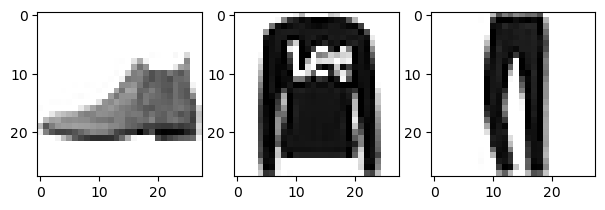

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


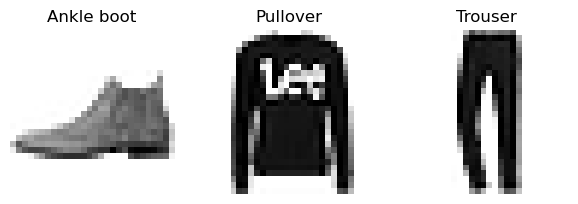

In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

### Load MNIST Dataset from Keras
from keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

### Details of data: contains 60,000 grayscale images, each 28x28 pixel
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Plot data
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

# Assign Class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Architecture
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

np.random.seed(42)
tf.random.set_seed(42)

model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

X_new = X_test[:3]

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

y_pred = np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]

y_new = y_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()